In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

In [15]:
#Counting how many gene/onts have significant p-values 
#there aren't any false positives
stem = '../../nf_pipeline/outputs/sprawl_20220531_permuted/gene_ont/'

data = {
    'f_name':[],
    'num_gene_sample_onts':[],
    'num_significant':[],
}
for f_path in sorted(glob.glob(os.path.join(stem,'*.csv'))):
    f_name = os.path.basename(f_path)
    
    df = pd.read_csv(f_path)
    data['f_name'].append(f_name)
    data['num_gene_sample_onts'].append(len(df))
    data['num_significant'].append(df['bh_p'].le(0.05).sum())
    
fdr_df = pd.DataFrame(data)
fdr_df

,f_name,num_gene_sample_onts,num_significant
0,BICCN_mouse1_central_gene_ont.csv,20090,0
1,BICCN_mouse1_peripheral_gene_ont.csv,20090,0
2,BICCN_mouse1_punctate_gene_ont.csv,13189,0
3,BICCN_mouse1_radial_gene_ont.csv,13189,0
4,BICCN_mouse2_central_gene_ont.csv,18142,0
5,BICCN_mouse2_peripheral_gene_ont.csv,18142,0
6,BICCN_mouse2_punctate_gene_ont.csv,11303,0
7,BICCN_mouse2_radial_gene_ont.csv,11303,0
8,CZB_kidney_central_gene_ont.csv,2789,0
9,CZB_kidney_peripheral_gene_ont.csv,2789,0


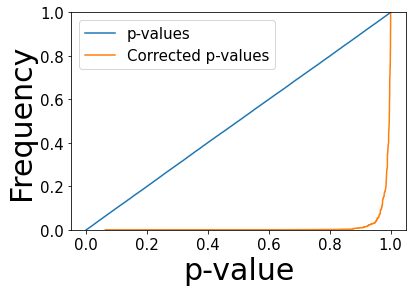

In [54]:
#Plotting distribution of gene/ont BH-p p-values over all samples gene/onts have significant p-values 
#the values are all localized to one side
stem = '../../nf_pipeline/outputs/sprawl_20220531_permuted/gene_ont/'

ps = []
bh_ps = []


for f_path in sorted(glob.glob(os.path.join(stem,'*.csv'))):
    f_name = os.path.basename(f_path)
    
    df = pd.read_csv(f_path)
    ps.extend(df['p'])
    bh_ps.extend(df['bh_p'])
    
fig,ax = plt.subplots()
sns.ecdfplot(ps,label='p-values',ax=ax)
sns.ecdfplot(bh_ps,label='Corrected p-values',ax=ax)
ax.set_xlabel('p-value', fontsize=30)
ax.set_ylabel('Frequency', fontsize=30)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.legend(prop={'size': 15})
plt.show()
plt.close()

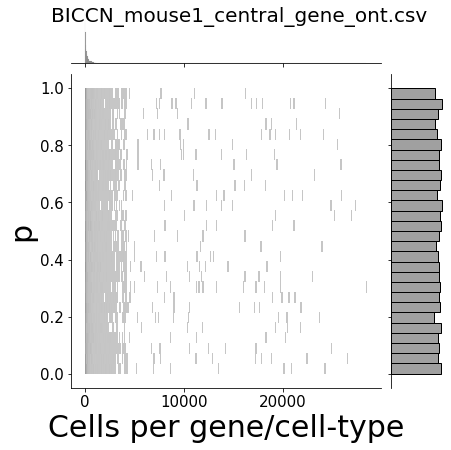

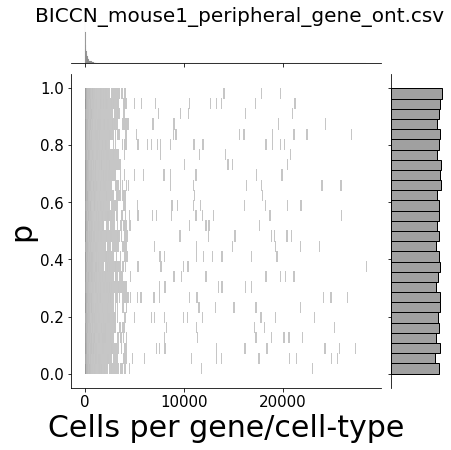

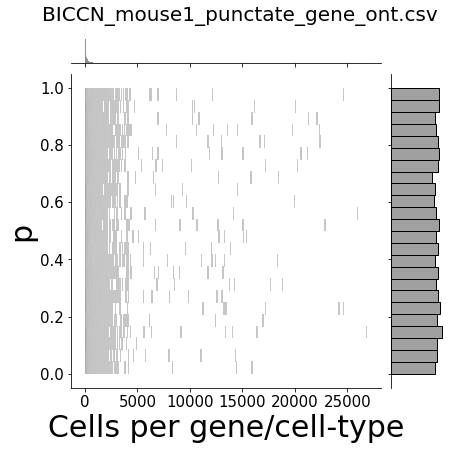

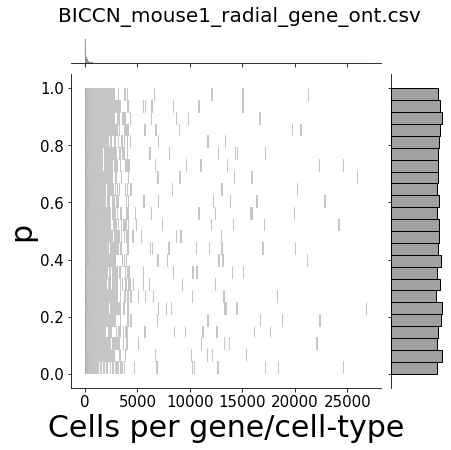

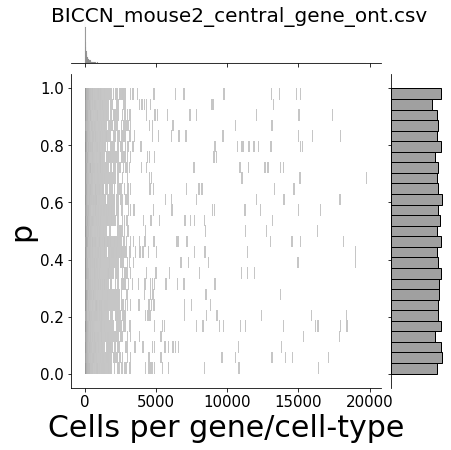

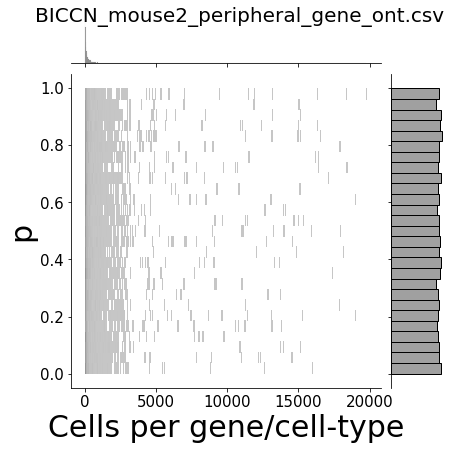

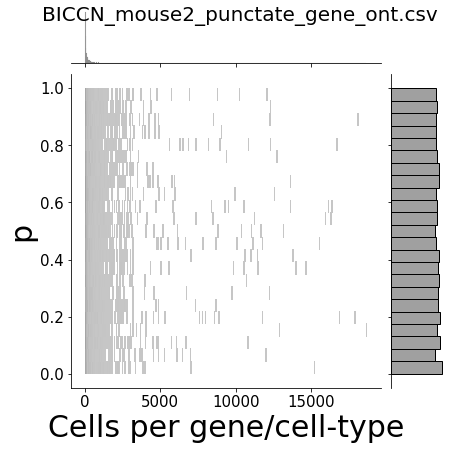

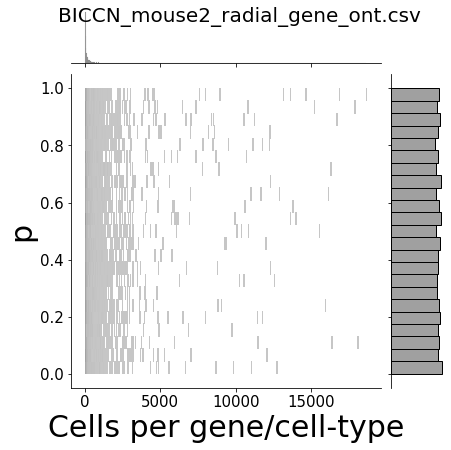

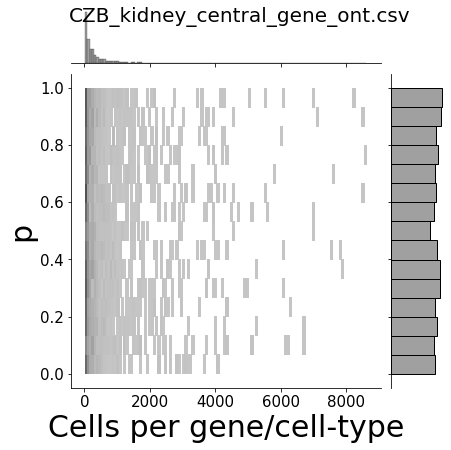

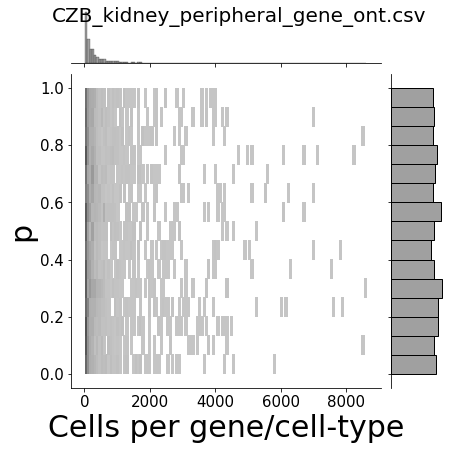

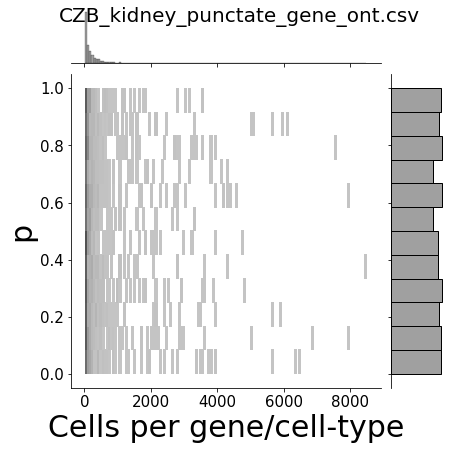

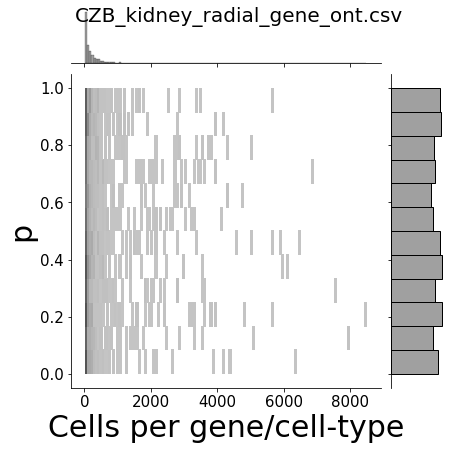

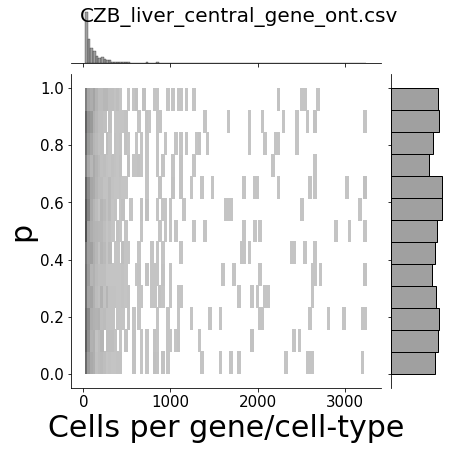

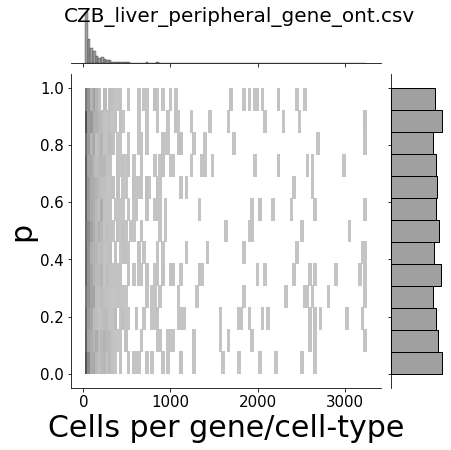

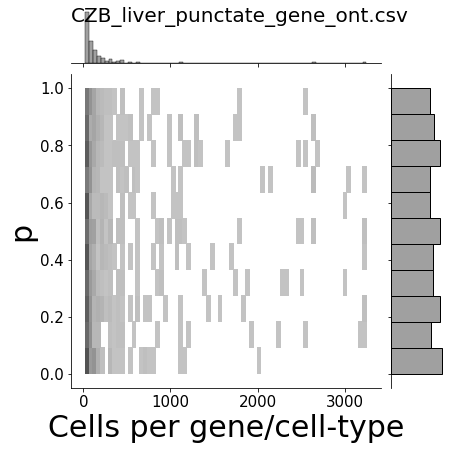

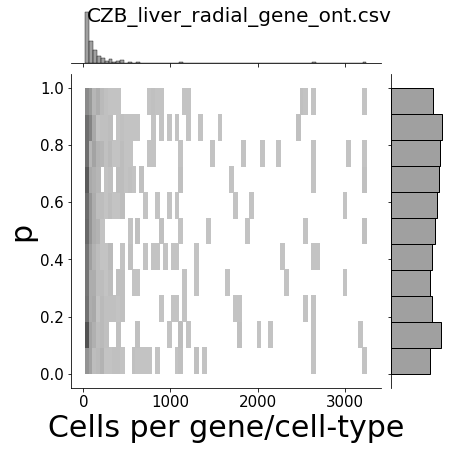

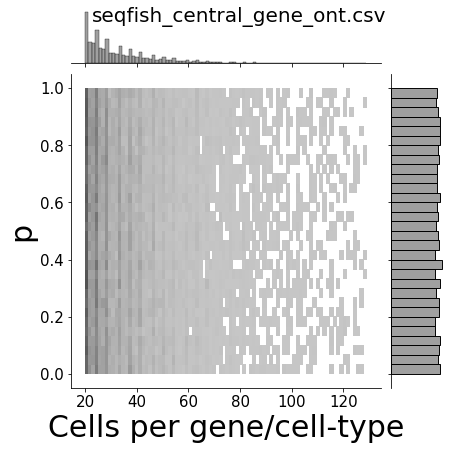

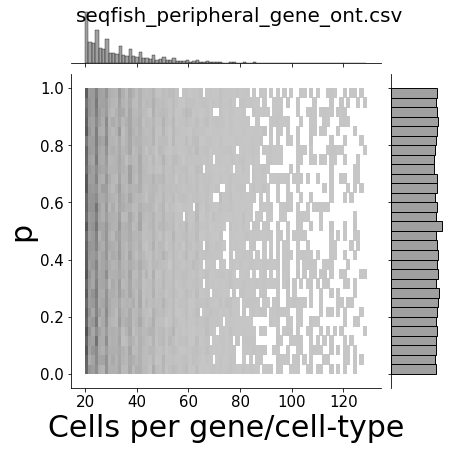

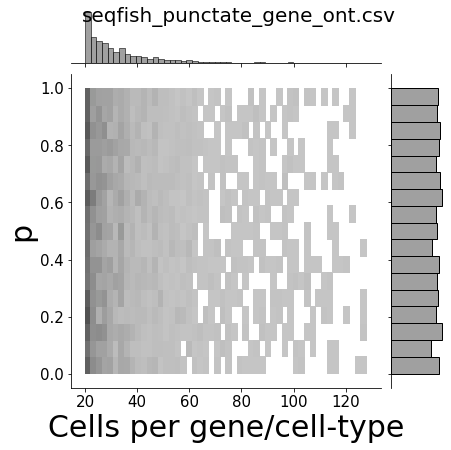

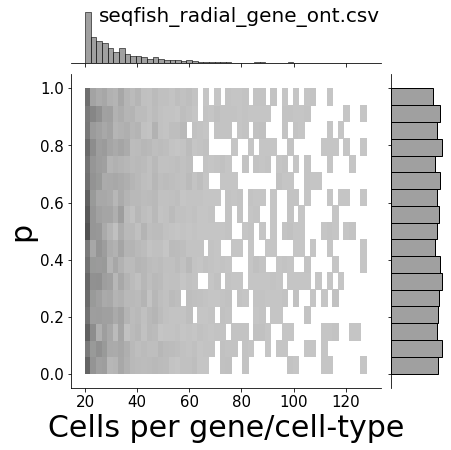

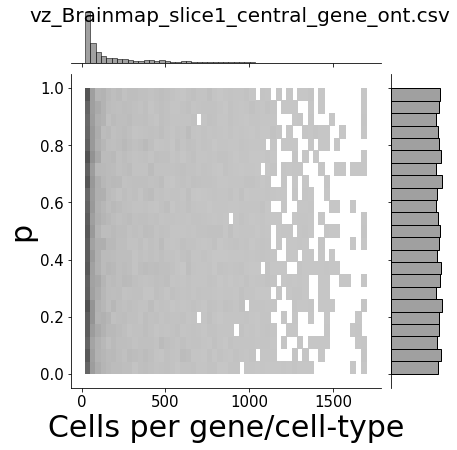

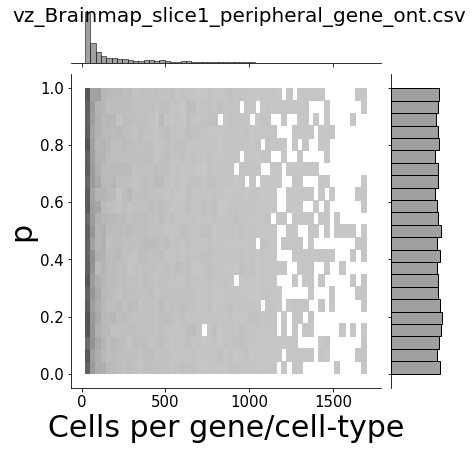

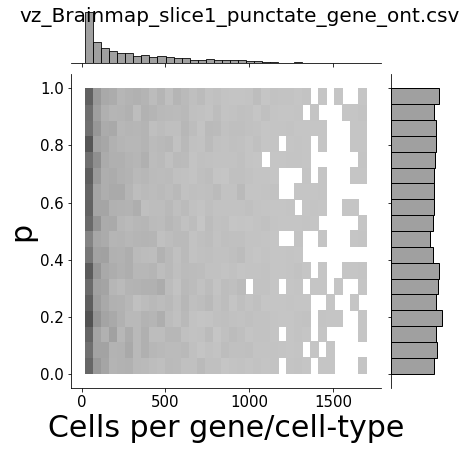

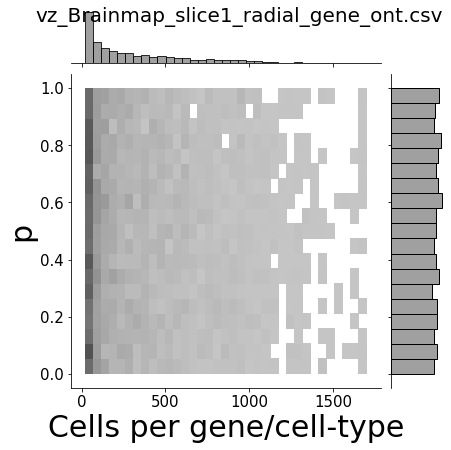

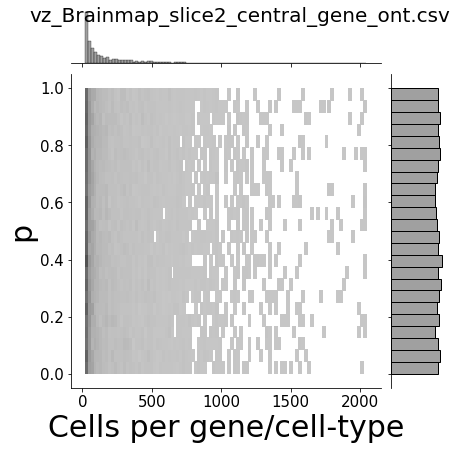

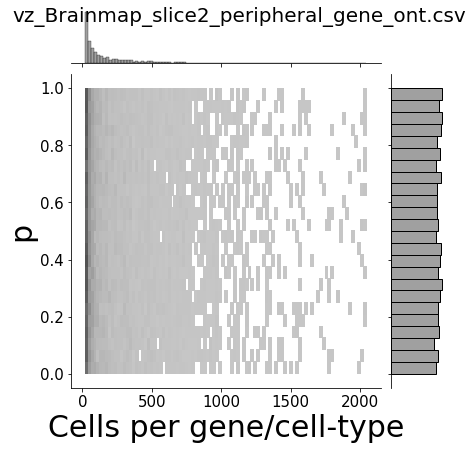

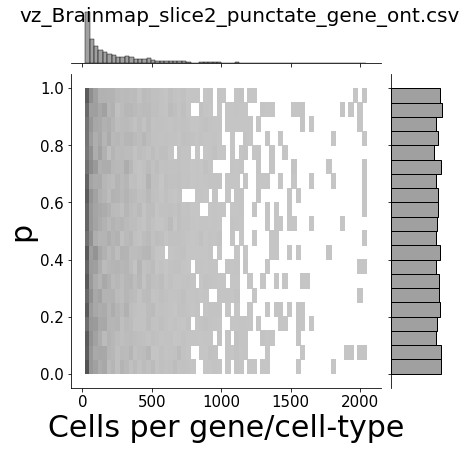

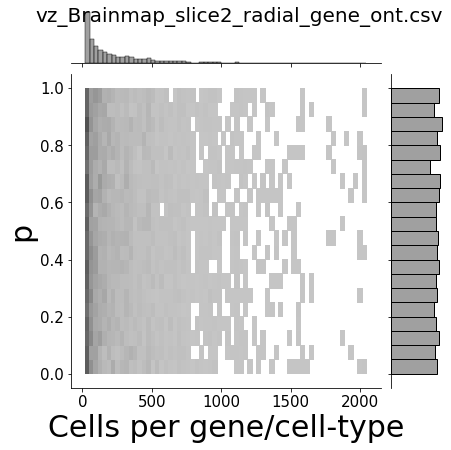

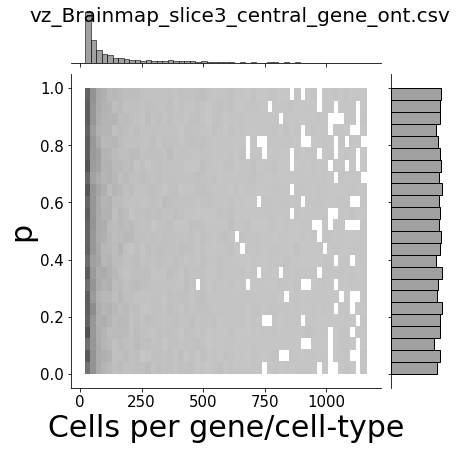

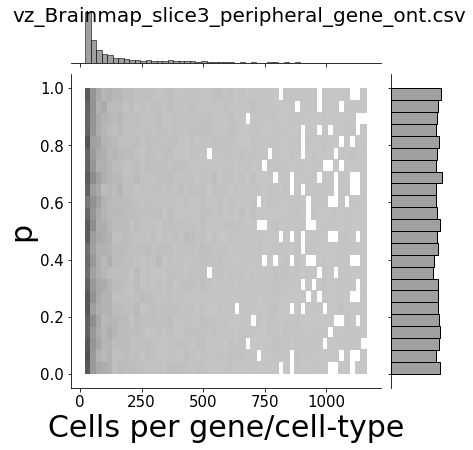

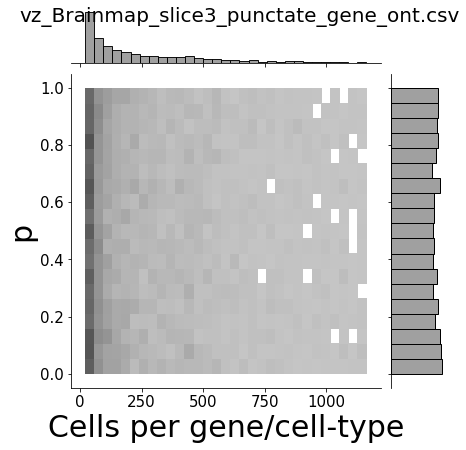

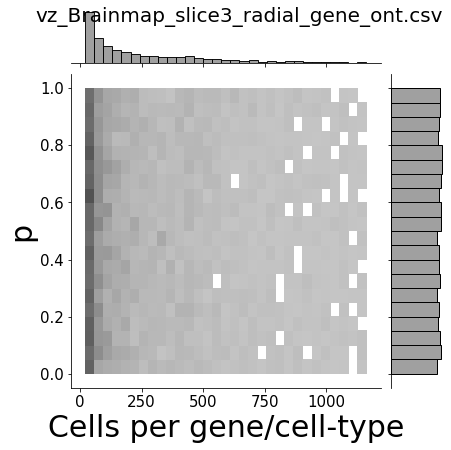

In [42]:
#Plotting distribution of gene/ont p-values as a function of cell-count
#all samples have a uniform distribution
stem = '../../nf_pipeline/outputs/sprawl_20220531_permuted/gene_ont/'


for f_path in sorted(glob.glob(os.path.join(stem,'*.csv'))):
    f_name = os.path.basename(f_path)
    
    df = pd.read_csv(f_path)
    
    j_ax = sns.jointplot(
        x = 'num_cells',
        y = 'p',
        kind = 'hist',
        color = 'grey',
        data = df,
    )
    plt.suptitle('{}'.format(f_name), fontsize=20)
    j_ax.ax_joint.set_xlabel('Cells per gene/cell-type', fontsize=30)
    j_ax.ax_joint.set_ylabel('p', fontsize=30)
    j_ax.ax_joint.tick_params(axis='x', labelsize=15)
    j_ax.ax_joint.tick_params(axis='y', labelsize=15)
    plt.show()
    plt.close()

    

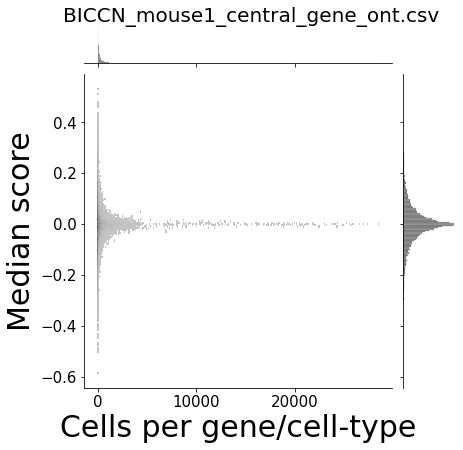

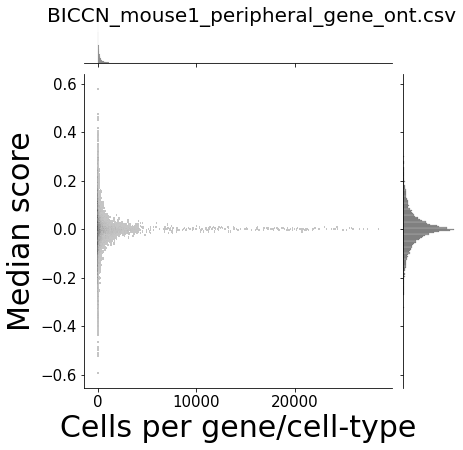

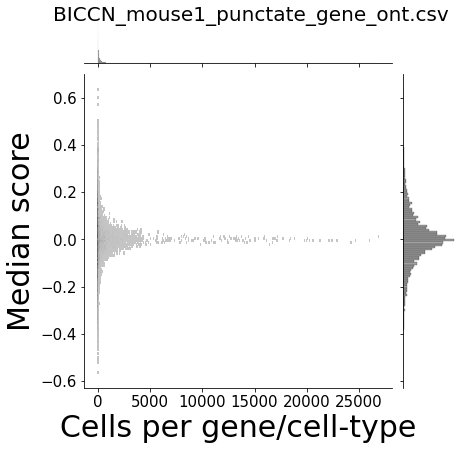

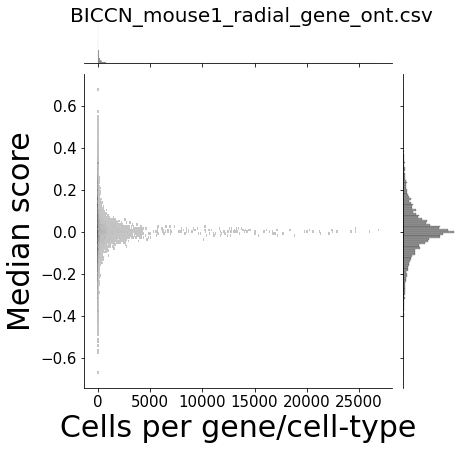

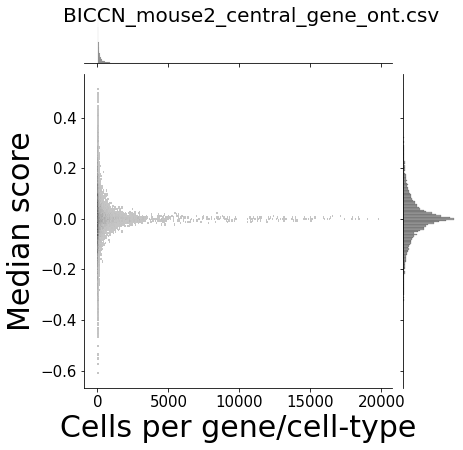

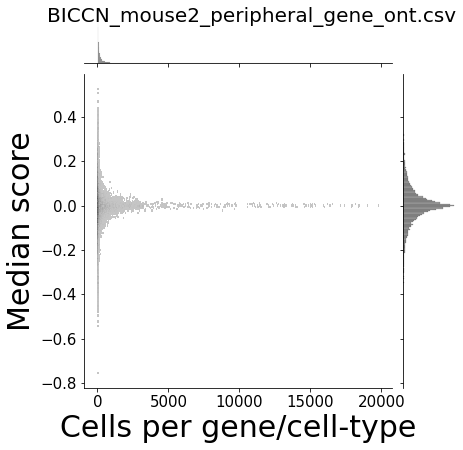

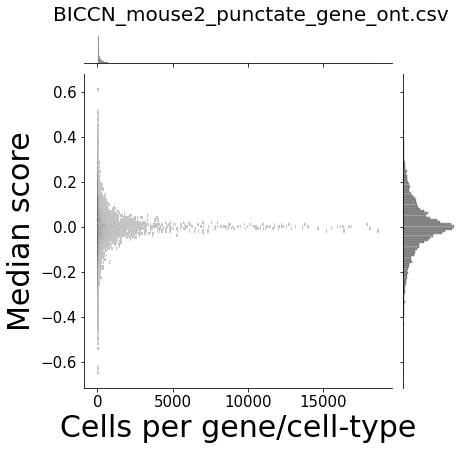

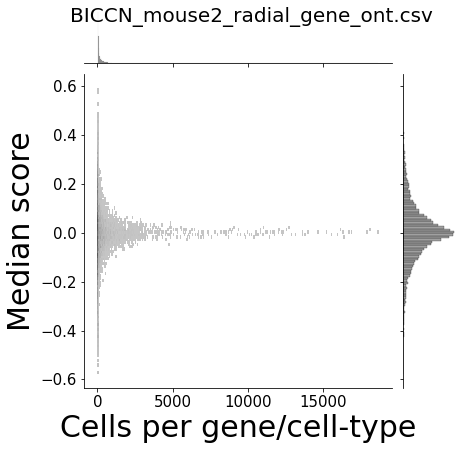

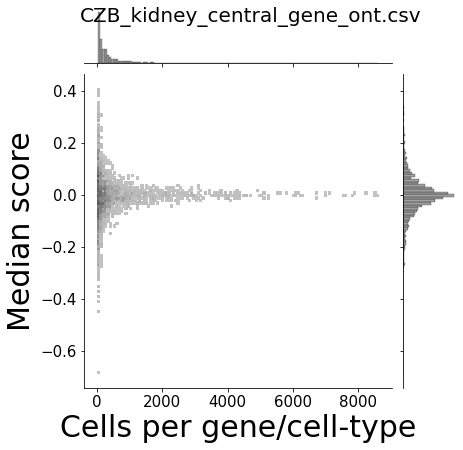

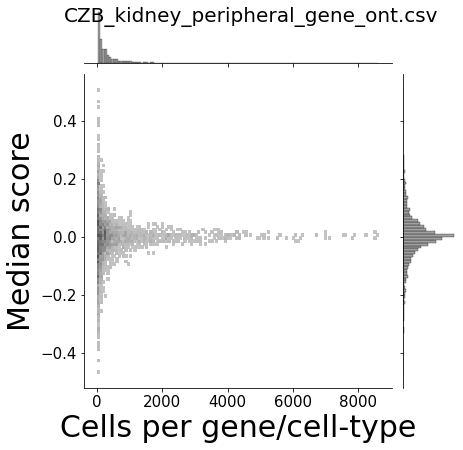

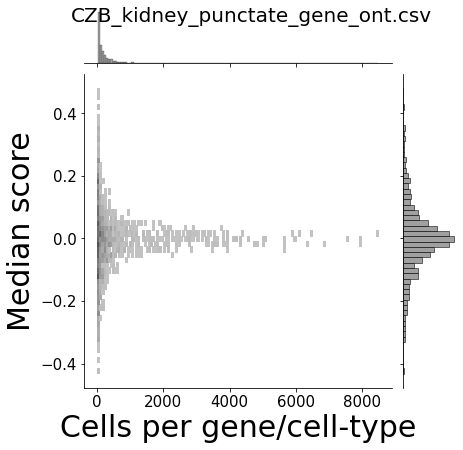

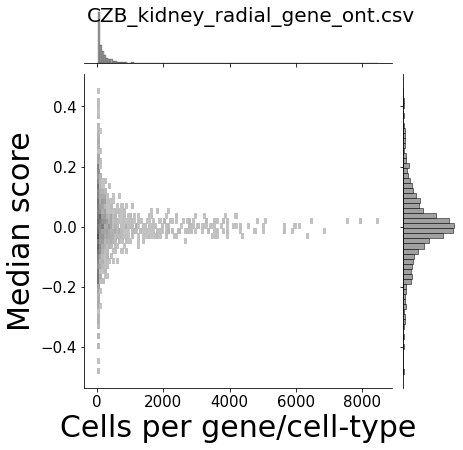

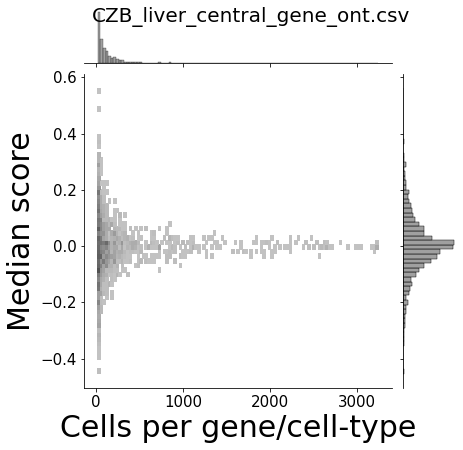

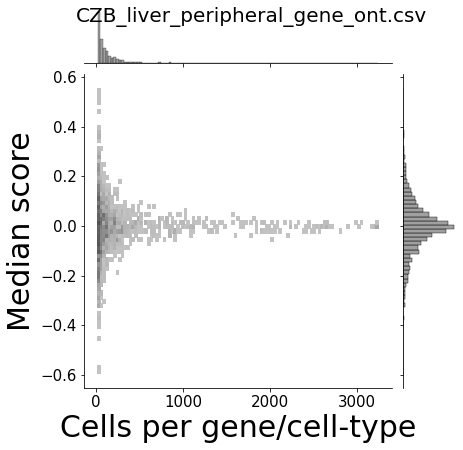

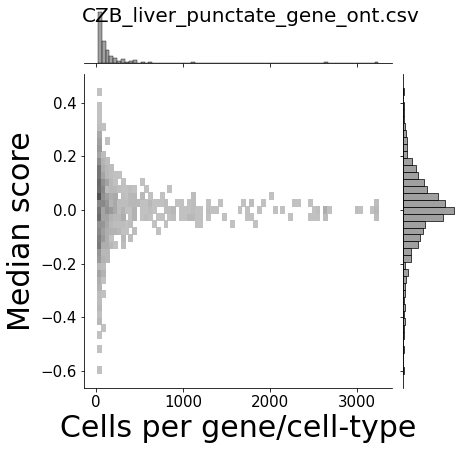

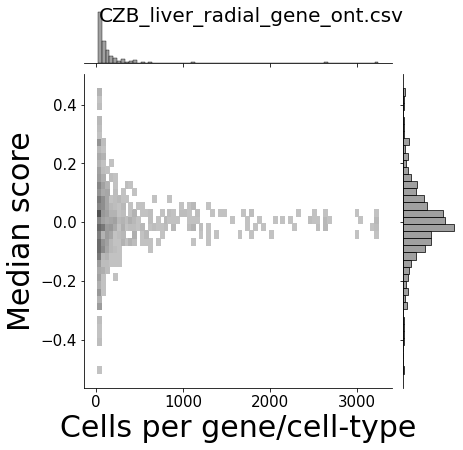

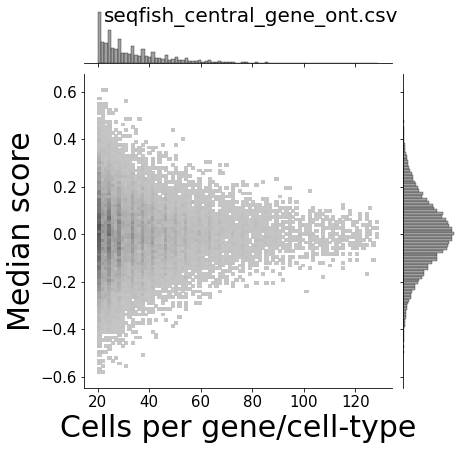

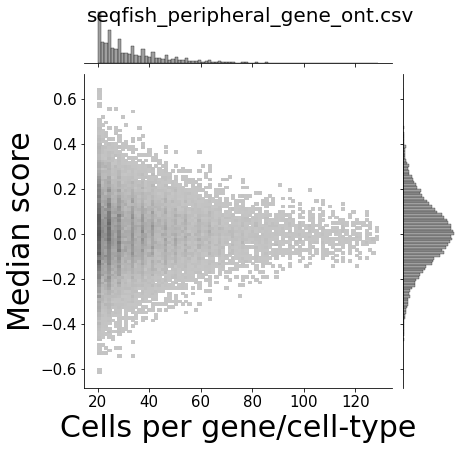

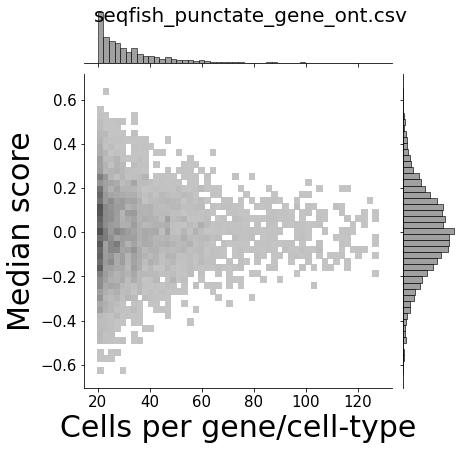

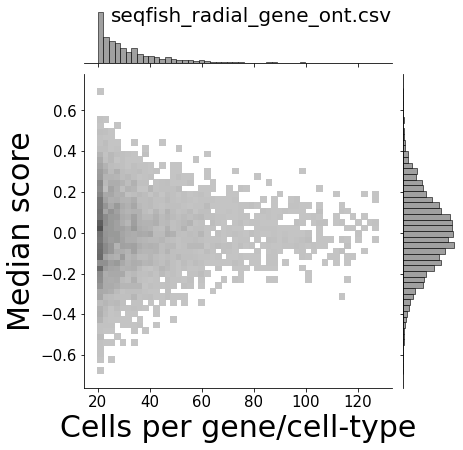

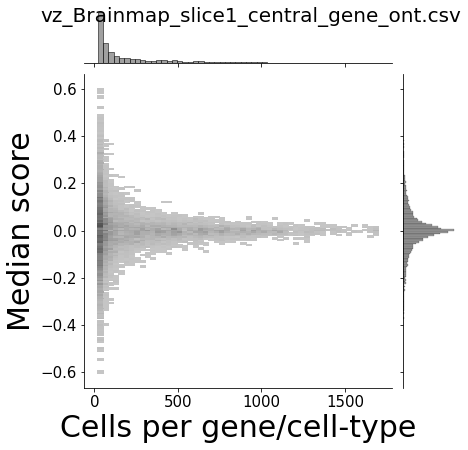

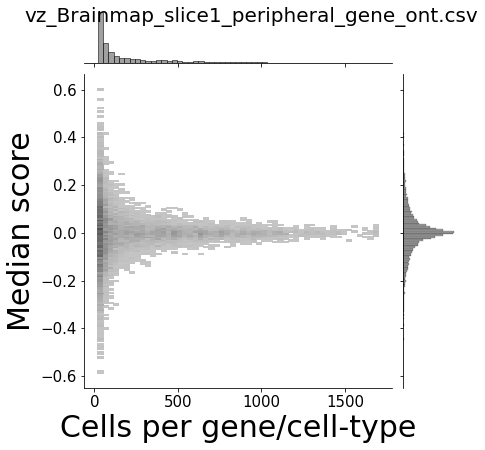

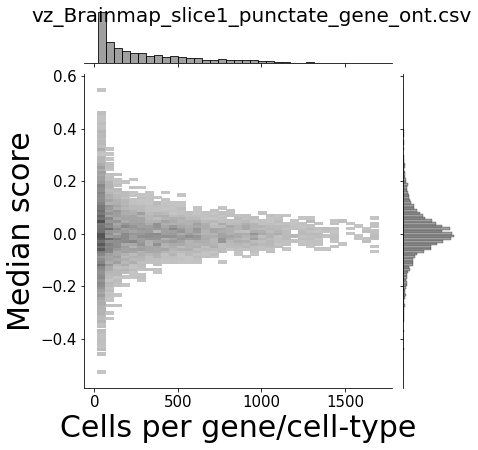

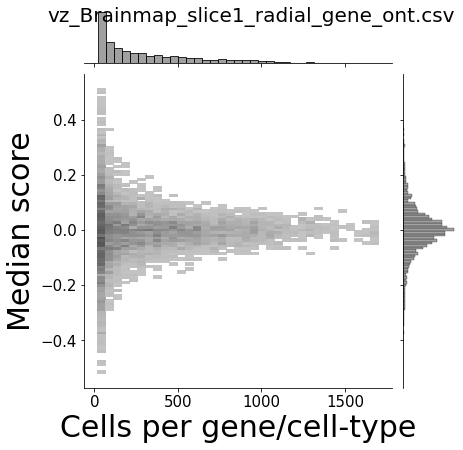

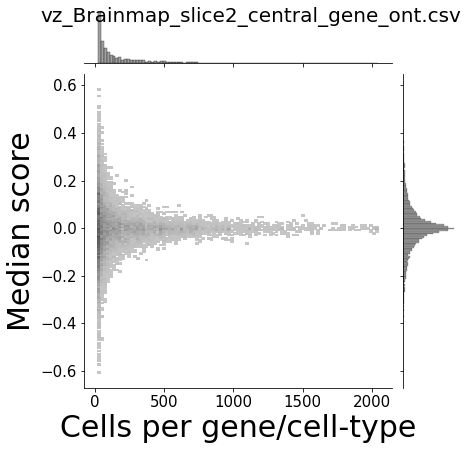

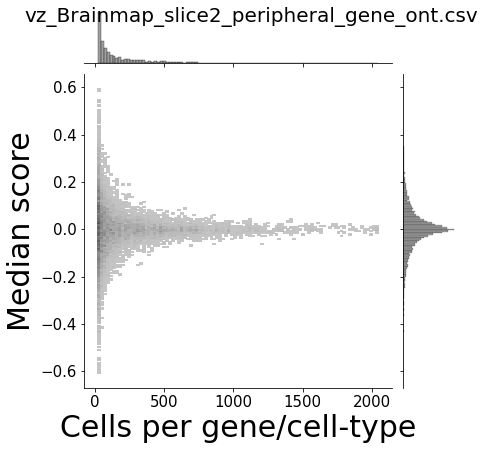

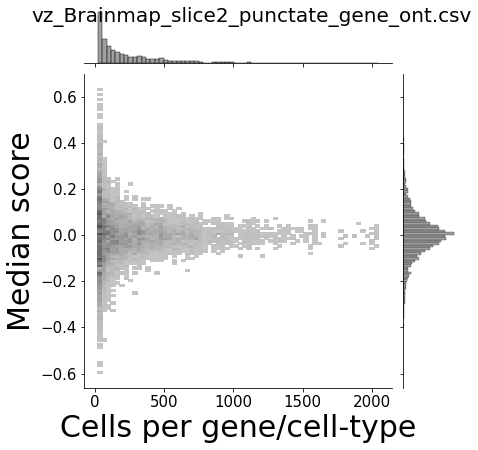

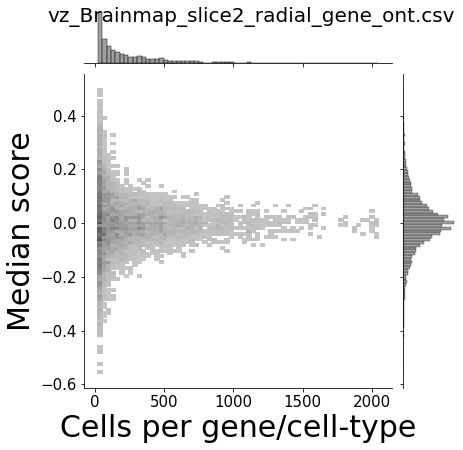

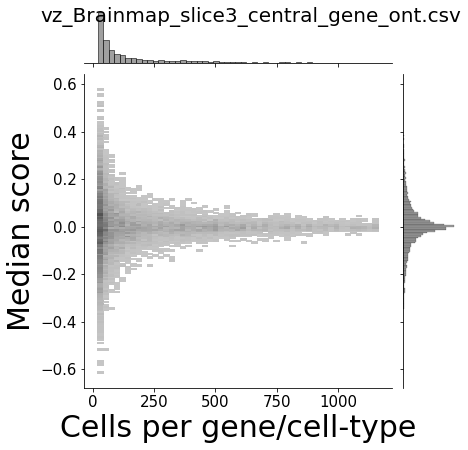

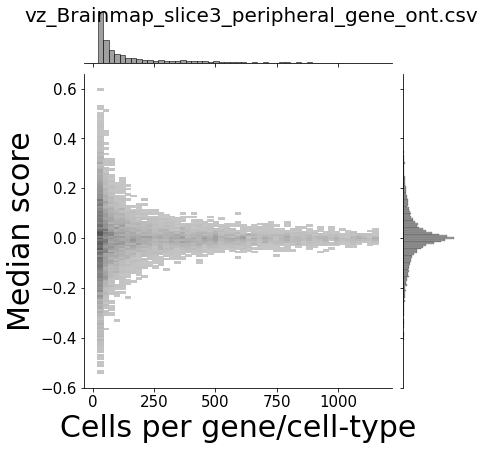

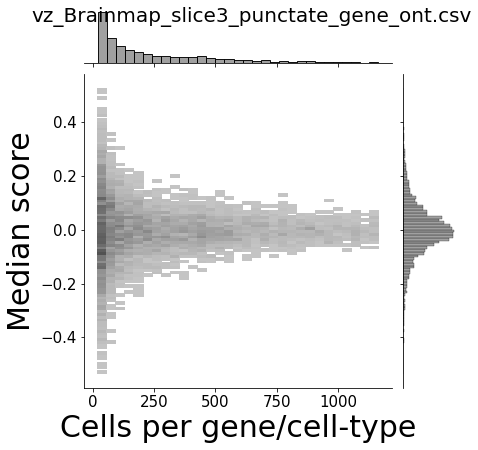

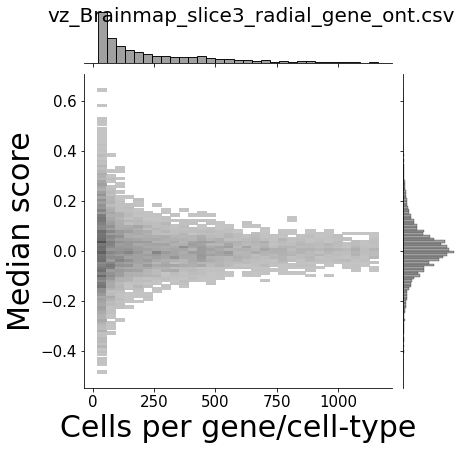

In [60]:
#Plotting distribution of gene/ont median scores as a function of cell-count
#--> results, in all samples, gene/onts with fewer cells have more extreme median scores
stem = '../../nf_pipeline/outputs/sprawl_20220531_permuted/gene_ont/'


for f_path in sorted(glob.glob(os.path.join(stem,'*.csv'))):
    f_name = os.path.basename(f_path)
    
    df = pd.read_csv(f_path)
    
    j_ax = sns.jointplot(
        x = 'num_cells',
        y = 'med_score',
        kind = 'hist',
        color = 'grey',
        data = df,
    )
    plt.suptitle('{}'.format(f_name), fontsize=20)
    j_ax.ax_joint.set_xlabel('Cells per gene/cell-type', fontsize=30)
    j_ax.ax_joint.set_ylabel('Median score', fontsize=30)
    j_ax.ax_joint.tick_params(axis='x', labelsize=15)
    j_ax.ax_joint.tick_params(axis='y', labelsize=15)
    
    plt.show()
    plt.close()

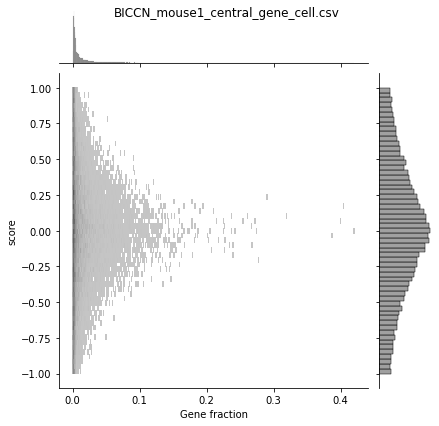

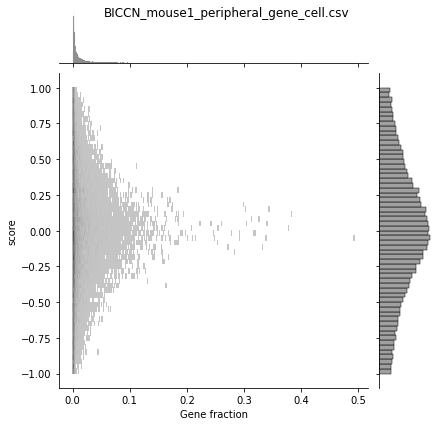

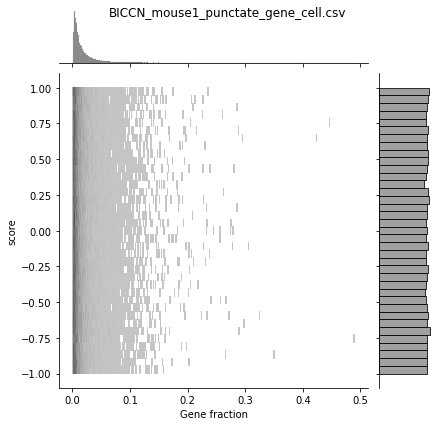

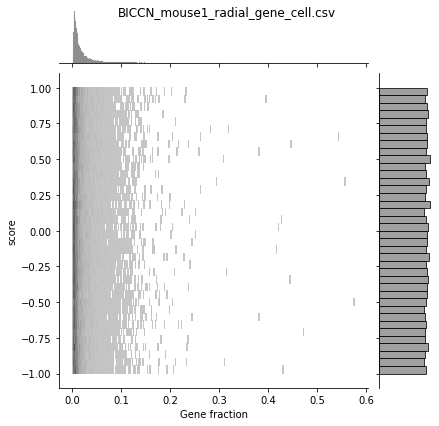

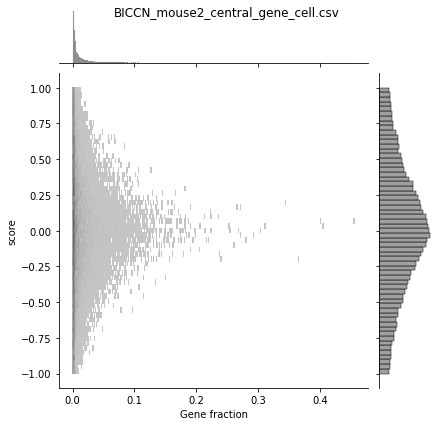

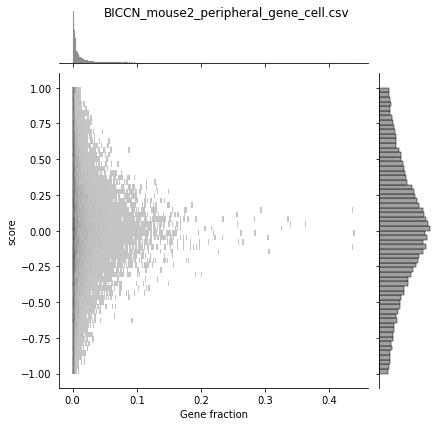

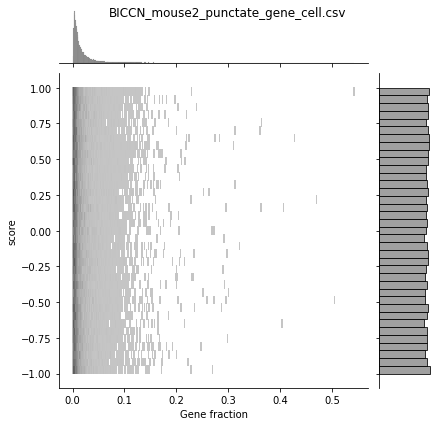

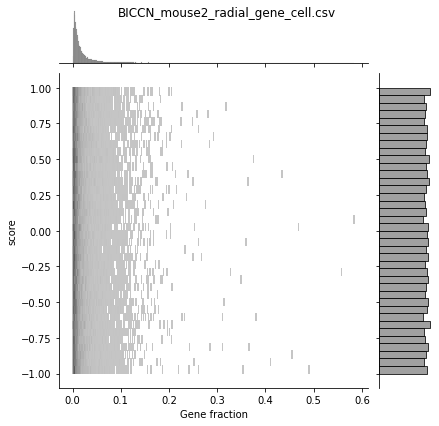

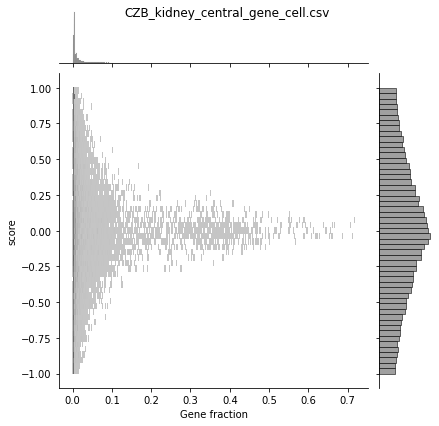

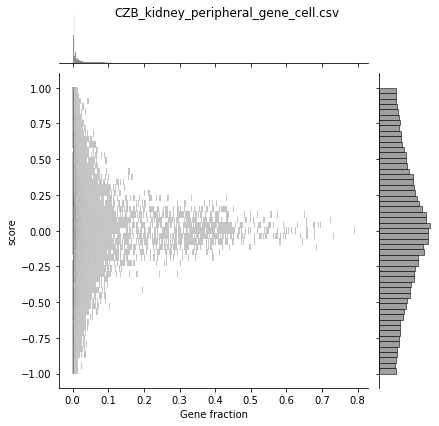

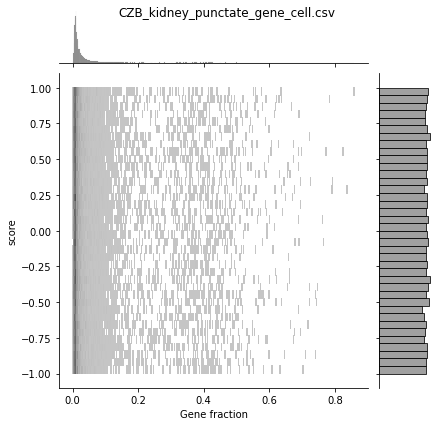

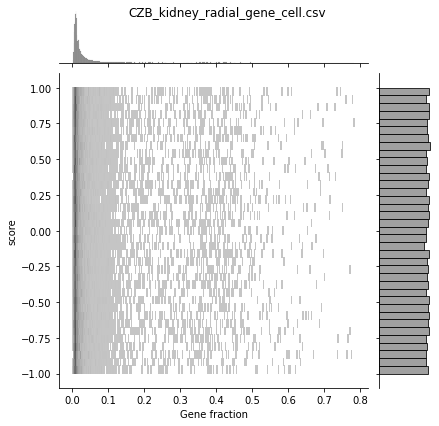

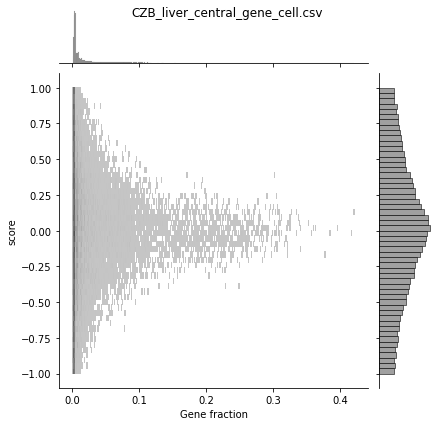

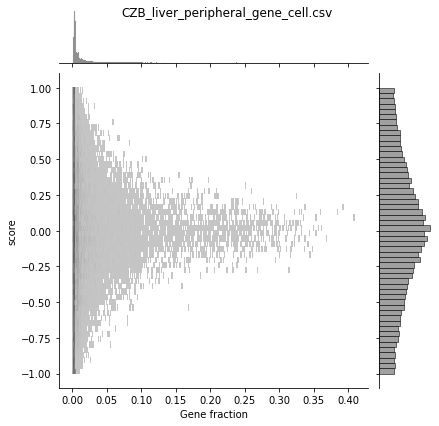

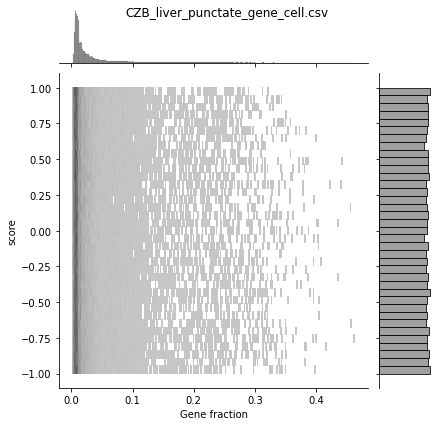

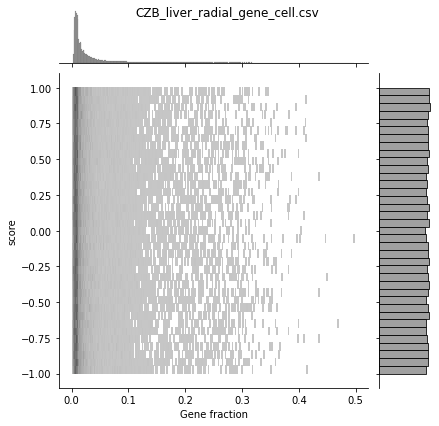

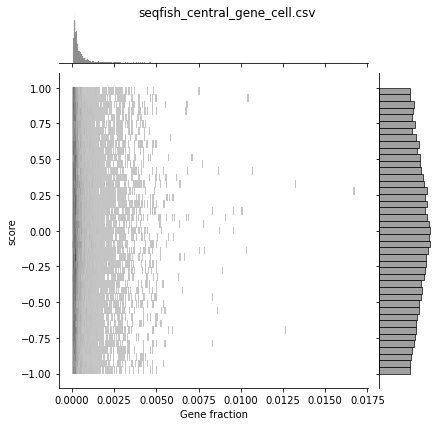

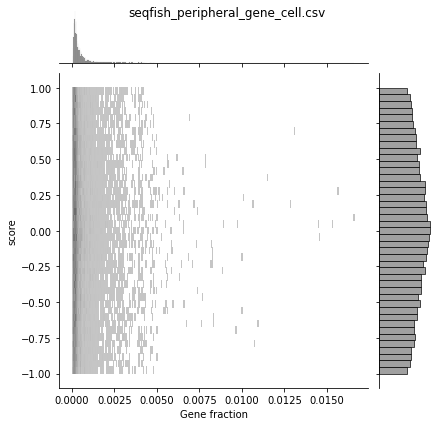

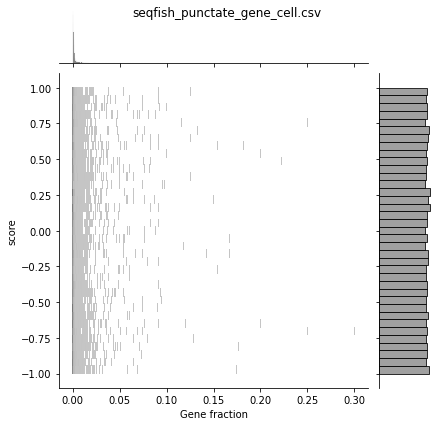

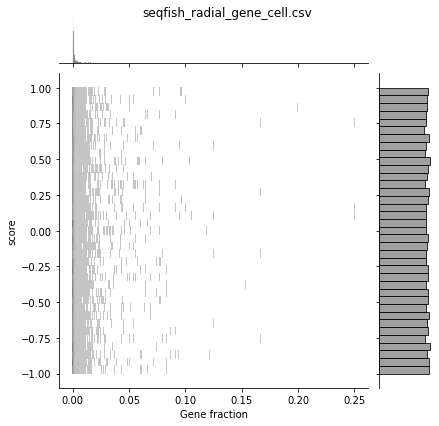

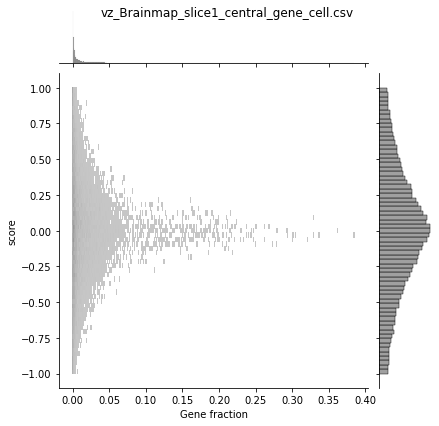

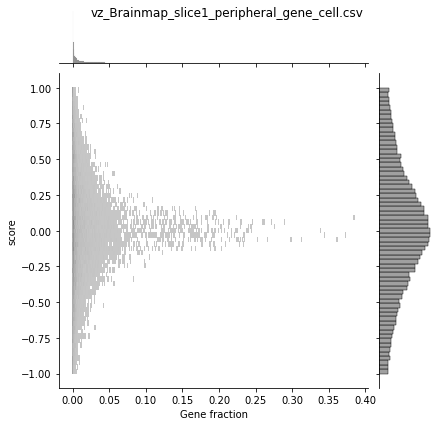

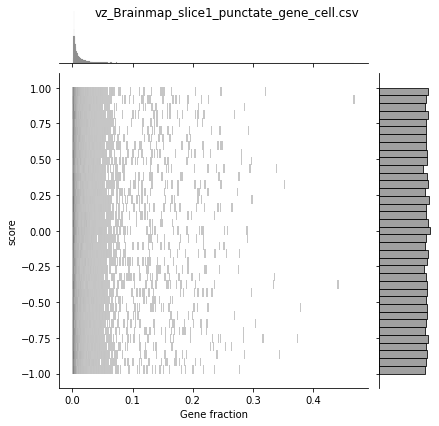

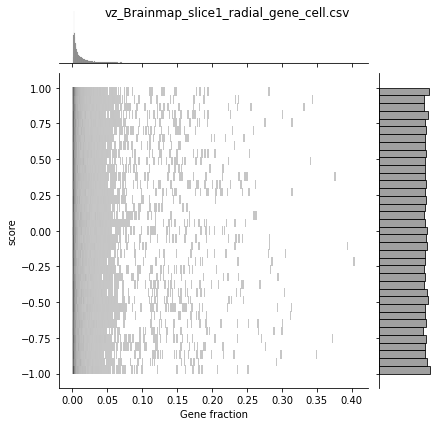

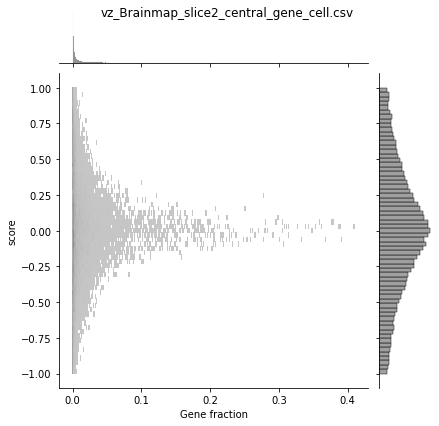

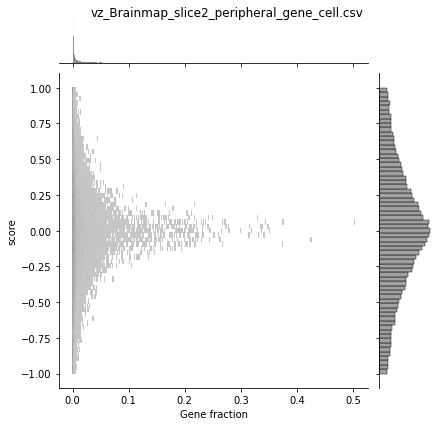

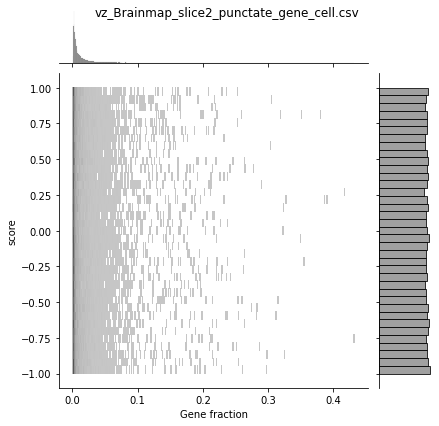

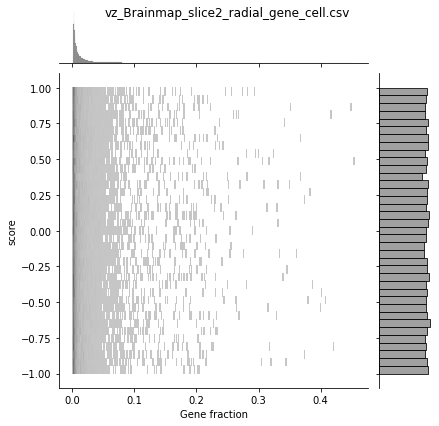

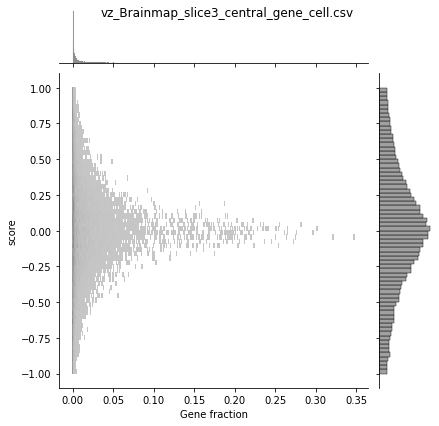

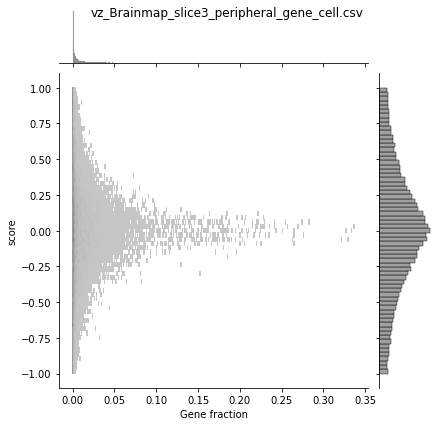

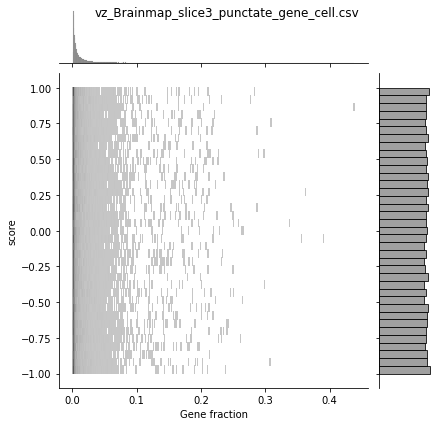

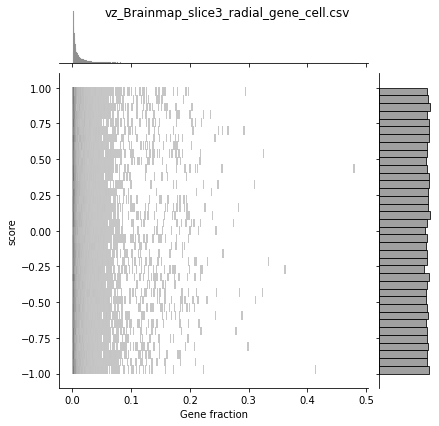

In [26]:
#Plotting distribution of gene/cell scores as a function of gene fraction
#--> results
stem = '../../nf_pipeline/outputs/sprawl_20220531_permuted/gene_cell/'


for f_path in sorted(glob.glob(os.path.join(stem,'*.csv'))):
    f_name = os.path.basename(f_path)
    
    df = pd.read_csv(f_path)
    df['Gene fraction'] = df['num_gene_spots'].div(df['num_spots'])
    
    sns.jointplot(
        x = 'Gene fraction',
        y = 'score',
        kind = 'hist',
        color = 'grey',
        data = df.sample(50000), #plot a subset of gene/cells for speed
    )
    plt.suptitle('{}'.format(f_name))
    plt.show()
    plt.close()
    